In [34]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
#reading the dataset into the pandas dataframe
retail_sales_df = pd.read_csv("retail_sales_dataset.csv")

In [40]:
#Displaying the first 5 rows of the dataset
retail_sales_df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [42]:
#Displaying the last 5 rows of the dataset
retail_sales_df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [44]:
#Now lets take a look at the data information
retail_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [46]:
retail_sales_df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [49]:
retail_sales_df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [52]:
retail_sales_df.duplicated().sum()

0

In [56]:
# Date

date_counts = pd.DataFrame(retail_sales_df['Date'].value_counts()).sort_values('Date')
date_counts

,count
Date,
2023-01-01,3
2023-01-02,4
2023-01-03,1
2023-01-04,3
2023-01-05,3
...,...
2023-12-27,2
2023-12-28,3
2023-12-29,4


In [59]:
retail_sales_df[['Gender', 'Age']]\
.groupby('Gender')['Age']\
.agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'count'])

,sum,mean,min,max,median,std,count
Gender,,,,,,,
Female,21092,41.356863,18,64,42.0,13.568067,510
Male,20300,41.428571,18,64,42.0,13.812208,490


* Age by Product Category

In [63]:
retail_sales_df[['Product Category', 'Age']]\
.groupby('Product Category')['Age']\
.agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'count'])

,sum,mean,min,max,median,std,count
Product Category,,,,,,,
Beauty,12394,40.371336,18,64,41.0,13.889817,307
Clothing,14724,41.948718,18,64,42.0,13.498262,351
Electronics,14274,41.736842,18,64,42.0,13.669573,342


* Quantity by Product Category

In [66]:
retail_sales_df[['Product Category', 'Quantity']]\
.groupby('Product Category')['Quantity']\
.agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'count'])

,sum,mean,min,max,median,std,count
Product Category,,,,,,,
Beauty,771,2.511401,1,4,3.0,1.100668,307
Clothing,894,2.547009,1,4,3.0,1.142647,351
Electronics,849,2.482456,1,4,2.0,1.153084,342


* Price/Unit by Product Category

In [69]:
retail_sales_df[['Product Category', 'Price per Unit']]\
.groupby('Product Category')['Price per Unit']\
.agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'count'])

,sum,mean,min,max,median,std,count
Product Category,,,,,,,
Beauty,56505,184.055375,25,500,50.0,194.929399,307
Clothing,61175,174.287749,25,500,50.0,186.017065,351
Electronics,62210,181.900585,25,500,50.0,189.049673,342


* Total Amount by Product Category

In [72]:
retail_sales_df[['Product Category', 'Total Amount']]\
.groupby('Product Category')['Total Amount']\
.agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'count'])

,sum,mean,min,max,median,std,count
Product Category,,,,,,,
Beauty,143515,467.475570,25,2000,120.0,563.612788,307
Clothing,155580,443.247863,25,2000,120.0,550.695917,351
Electronics,156905,458.786550,25,2000,150.0,567.540150,342


In [75]:
retail_sales_df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [77]:
# What are the prices for Categories of products?

data1 = retail_sales_df[['Product Category', 'Price per Unit']]
product_price = pd.DataFrame(data1)

frequency_table1 = {}
categories = ['Beauty', 'Clothing', 'Electronics']

for category in categories:
    for index, row in product_price.iterrows():
        if row['Product Category'] == category:
            price = row['Price per Unit']
            if category in frequency_table1:
                if price in frequency_table1[category]:
                    frequency_table1[category][price] += 1
                else:
                    frequency_table1[category][price] = 1
            else:
                frequency_table1[category] = {price: 1}

print("Frequency table for each category:")
for category, prices in frequency_table1.items():
    print("Category:", category)
    for price, count in prices.items():
        print("Price:", price, " - Count:", count)


Frequency table for each category:
Category: Beauty
Price: 50  - Count: 67
Price: 30  - Count: 56
Price: 25  - Count: 63
Price: 500  - Count: 68
Price: 300  - Count: 53
Category: Clothing
Price: 500  - Count: 64
Price: 25  - Count: 75
Price: 50  - Count: 75
Price: 30  - Count: 65
Price: 300  - Count: 72
Category: Electronics
Price: 30  - Count: 62
Price: 25  - Count: 72
Price: 300  - Count: 72
Price: 500  - Count: 67
Price: 50  - Count: 69


In [79]:
pd.DataFrame(frequency_table1)

,Beauty,Clothing,Electronics
50,67,75,69
30,56,65,62
25,63,75,72
500,68,64,67
300,53,72,72


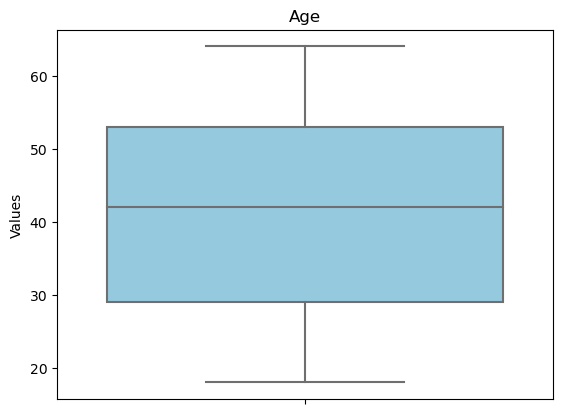

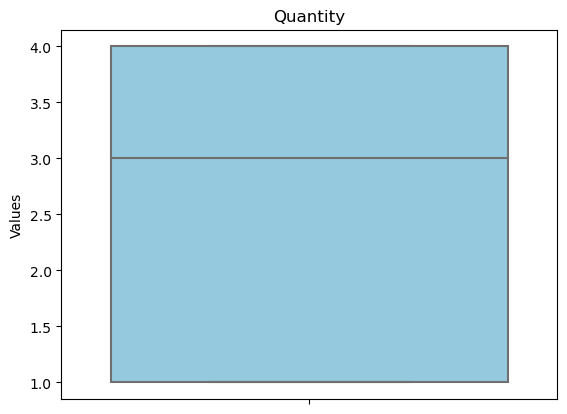

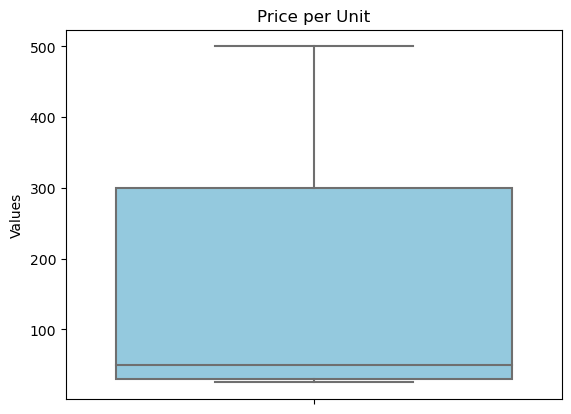

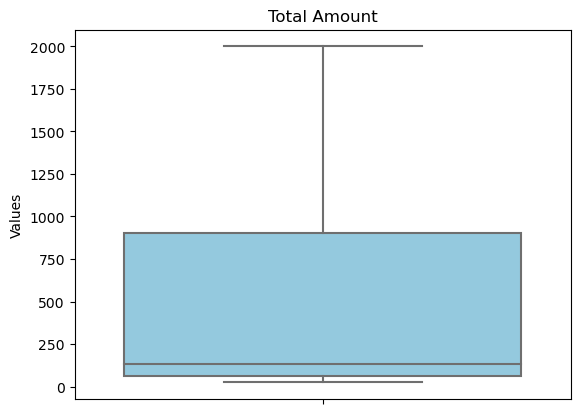

In [82]:
distribution_retail_sales_df = retail_sales_df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']]

for col in distribution_retail_sales_df.columns:
    plt.figure()
    sns.boxplot(y=distribution_retail_sales_df[col], color='skyblue')
    plt.title(f'{col}')
    plt.ylabel('Values')
       
plt.show()

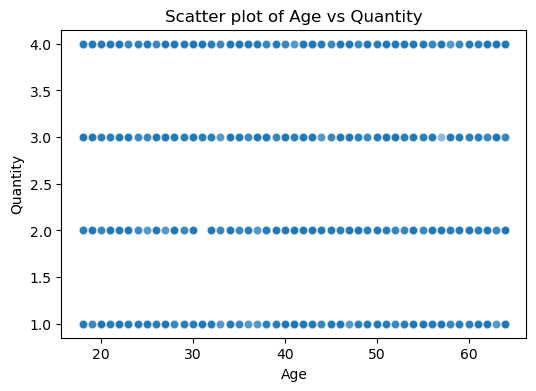

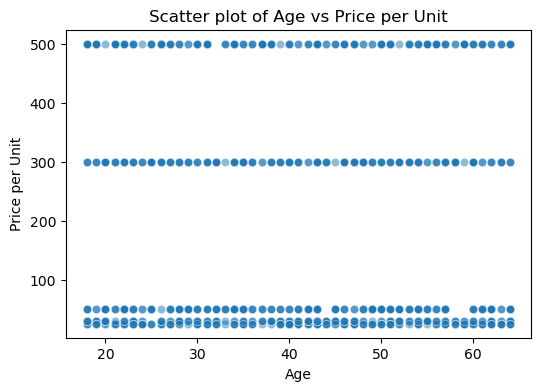

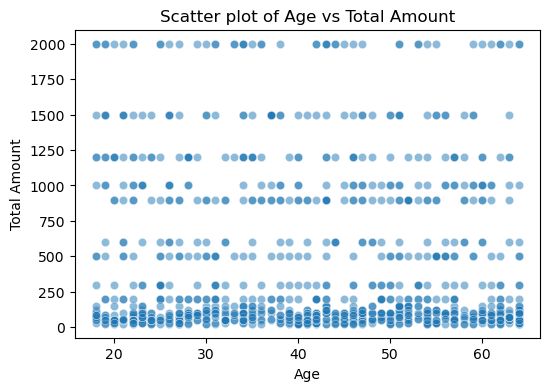

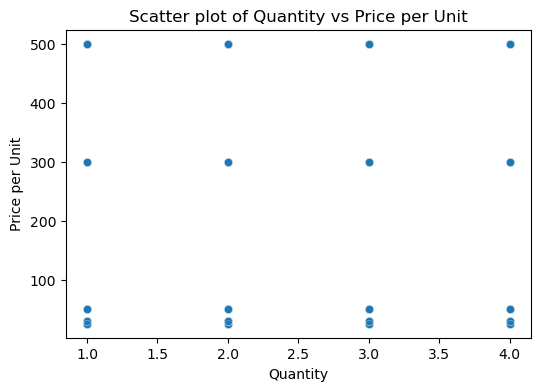

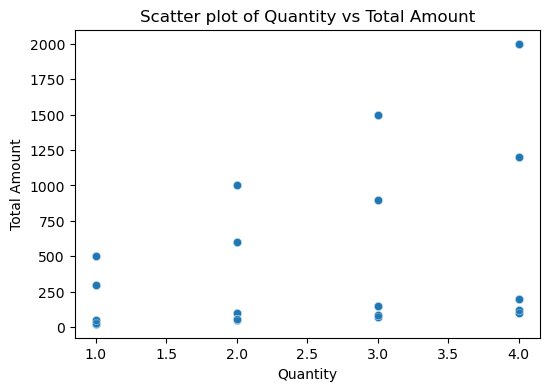

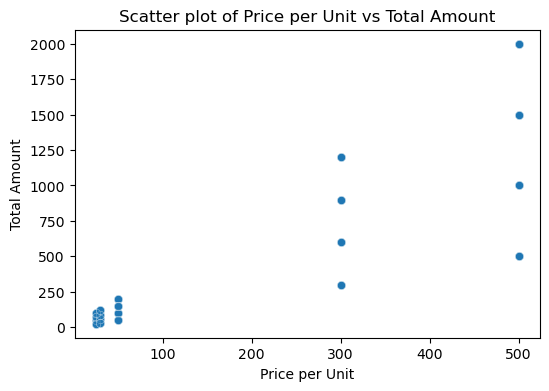

In [85]:
data2 = retail_sales_df
variables = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']

for i in range(len(variables)):
    for j in range(i + 1, len(variables)):
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=data2, x=variables[i], y=variables[j], alpha=0.5)
        plt.title(f'Scatter plot of {variables[i]} vs {variables[j]}')
        plt.xlabel(variables[i])
        plt.ylabel(variables[j])
        plt.show()

<Axes: >

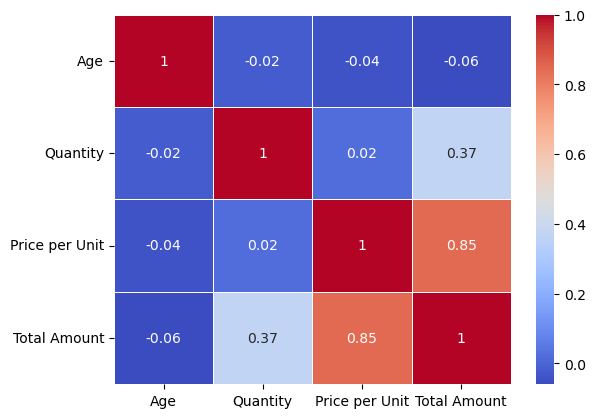

In [88]:
sns.heatmap(data=round(retail_sales_df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr(),2),cmap='coolwarm',linewidth= 0.5,annot=True)

In [91]:
retail_sales_df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [94]:
retail_sales_df.rename(columns=lambda x: x.lower(), inplace=True)

In [97]:
retail_sales_df.rename(columns=lambda x: x.strip().replace(' ', '_'), inplace=True)
retail_sales_df.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [100]:
retail_sales_df['date'] = pd.to_datetime(retail_sales_df['date'])

In [26]:
retail_sales_df.dtypes

transaction_id               int64
date                datetime64[ns]
customer_id                 object
gender                      object
age                          int64
product_category            object
quantity                     int64
price_per_unit               int64
total_amount                 int64
dtype: object

In [102]:
retail_sales_df.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [104]:
data3 = retail_sales_df[['product_category', 'age']]
product_age = pd.DataFrame(data3)

frequency_table2 = {}
categories = ['Beauty', 'Clothing', 'Electronics']

for category in categories:
    for index, row in product_age.iterrows():
        if row['product_category'] == category:
            age = row['age']
            if category in frequency_table2:
                if age in frequency_table2[category]:
                    frequency_table2[category][age] += 1
                else:
                    frequency_table2[category][age] = 1
            else:
                frequency_table2[category] = {age: 1}

print("Frequency table for each category:")
for category, ages in frequency_table2.items():
    print("Category:", category)
    for age, count in ages.items():
        print("Age:", age, " - Count:", count)


Frequency table for each category:
Category: Beauty
Age: 34  - Count: 12
Age: 30  - Count: 12
Age: 45  - Count: 9
Age: 35  - Count: 6
Age: 50  - Count: 5
Age: 64  - Count: 10
Age: 38  - Count: 6
Age: 43  - Count: 6
Age: 39  - Count: 10
Age: 58  - Count: 6
Age: 52  - Count: 6
Age: 18  - Count: 9
Age: 40  - Count: 4
Age: 27  - Count: 11
Age: 36  - Count: 4
Age: 31  - Count: 2
Age: 63  - Count: 3
Age: 21  - Count: 9
Age: 48  - Count: 5
Age: 56  - Count: 4
Age: 51  - Count: 8
Age: 61  - Count: 5
Age: 32  - Count: 7
Age: 19  - Count: 7
Age: 28  - Count: 6
Age: 47  - Count: 10
Age: 55  - Count: 7
Age: 22  - Count: 9
Age: 60  - Count: 5
Age: 25  - Count: 7
Age: 46  - Count: 13
Age: 59  - Count: 5
Age: 62  - Count: 8
Age: 54  - Count: 10
Age: 42  - Count: 9
Age: 20  - Count: 8
Age: 57  - Count: 9
Age: 23  - Count: 6
Age: 29  - Count: 4
Age: 26  - Count: 4
Age: 49  - Count: 5
Age: 24  - Count: 5
Age: 44  - Count: 2
Age: 41  - Count: 2
Age: 33  - Count: 3
Age: 37  - Count: 2
Age: 53  - Count: 2


In [106]:
category_by_age = pd.DataFrame(frequency_table2)\
.sort_values('Clothing', ascending=False)\
.reset_index()\
.rename(columns= {'index':'age'})\
.sort_values('age')\
.reset_index()\
.drop(columns= ['index'])\
.rename(columns= {'Beauty':'amount_beauty', 'Clothing':'amount_clothing', 'Electronics':'amount_electronics'})
category_by_age.head()

,age,amount_beauty,amount_clothing,amount_electronics
0,18,9,7,5
1,19,7,3,11
2,20,8,6,7
3,21,9,7,4
4,22,9,8,10


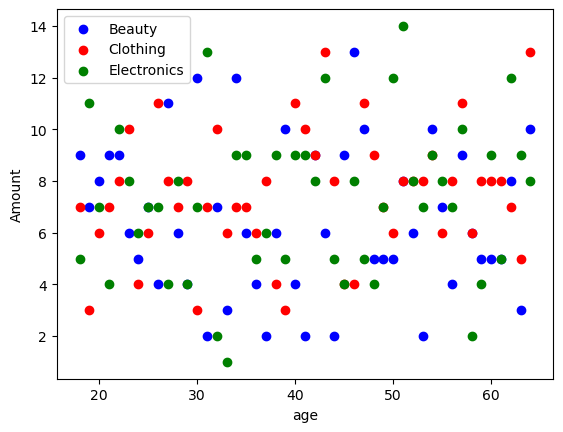

In [108]:
sns.scatterplot(x=category_by_age.age, s=50)
plt.scatter(category_by_age['age'], category_by_age['amount_beauty'], color='blue', label='Beauty')
plt.scatter(category_by_age['age'], category_by_age['amount_clothing'], color='red', label='Clothing')  # เพิ่มจุดจากคอลัมน์ 'amount_clothing'
plt.scatter(category_by_age['age'], category_by_age['amount_electronics'], color='green', label='Electronics')  # เพิ่มจุดจากคอลัมน์ 'amount_electronics'
plt.ylabel('Amount')
plt.legend()
plt.show()

In [110]:
# Create a function to segment customers by age.
def categorize_age(age):
    if age >= 18 and age <= 24:
        return 'Age:18-24'
    elif age >= 25 and age <= 34:
        return 'Age:25-34'
    elif age >= 35 and age <= 44:
        return 'Age:35-44'
    elif age >= 45 and age <= 54:
        return 'Age:45-54'
    elif age >= 55 and age <= 64:
        return 'Age:55-64'

# Create a new column in DataFrame named 'Age Group' and use the function categorize_age To divide into age groups
category_by_age['age_group'] = category_by_age['age'].apply(categorize_age)

category_by_age.head()

,age,amount_beauty,amount_clothing,amount_electronics,age_group
0,18,9,7,5,Age:18-24
1,19,7,3,11,Age:18-24
2,20,8,6,7,Age:18-24
3,21,9,7,4,Age:18-24
4,22,9,8,10,Age:18-24


In [112]:
retail_sales_df['age_group'] = retail_sales_df['age'].apply(categorize_age)
retail_sales_df.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,age_group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Age:25-34
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Age:25-34
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Age:45-54
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Age:35-44
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Age:25-34


In [114]:
retail_sales_df.groupby(['age_group'])['age_group'].agg('count')

age_group
Age:18-24    149
Age:25-34    203
Age:35-44    207
Age:45-54    225
Age:55-64    216
Name: age_group, dtype: int64

In [116]:
# Find the sum of the number of products in each category divided by age.
sum_by_age_category = pd.DataFrame(category_by_age.groupby(['age_group'])\
                                   .agg({'amount_beauty': 'sum', 'amount_clothing': 'sum', 'amount_electronics': 'sum'})\
                                   .reset_index())\
                                   .sort_values('age_group')\
                                   .transpose()\
                                   .rename(columns= {0:'Age:18-24', 1:'Age:25-34', 2:'Age:35-44', 3:'Age:45-54', 4:'Age:55-64'})\
                                   .reset_index()\
                                   .drop(index=0)\
                                   .reset_index()\
                                   .drop(columns= ['level_0'])\
                                   .rename(columns= {'index':'amount_by_category'})
                                   
sum_by_age_category

,amount_by_category,Age:18-24,Age:25-34,Age:35-44,Age:45-54,Age:55-64
0,amount_beauty,53,68,51,73,62
1,amount_clothing,45,73,79,74,80
2,amount_electronics,51,62,77,78,74


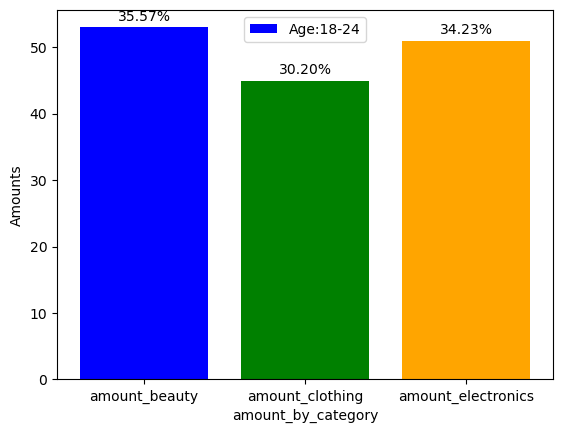

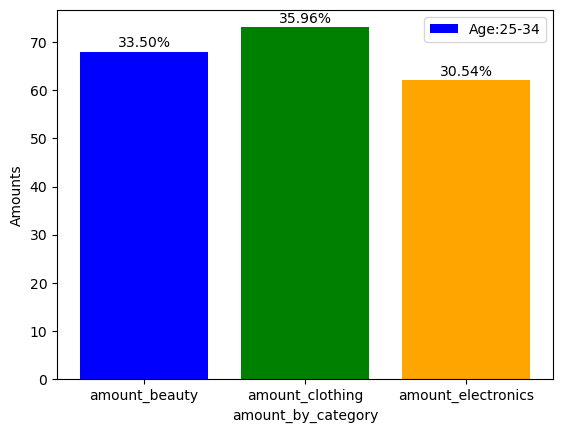

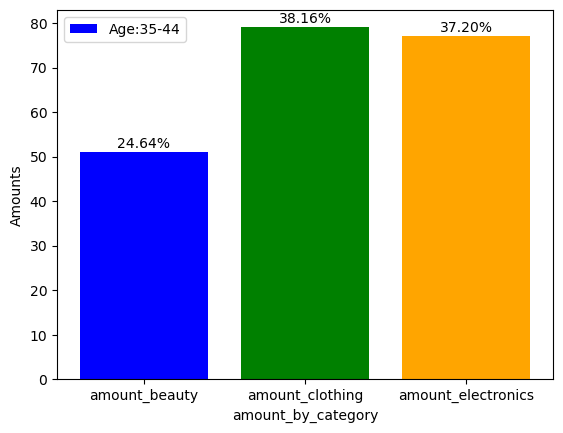

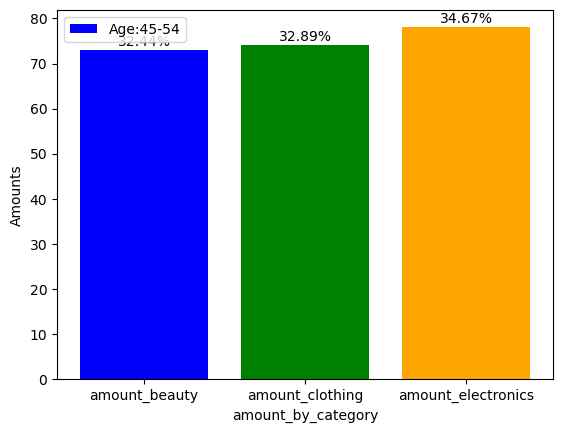

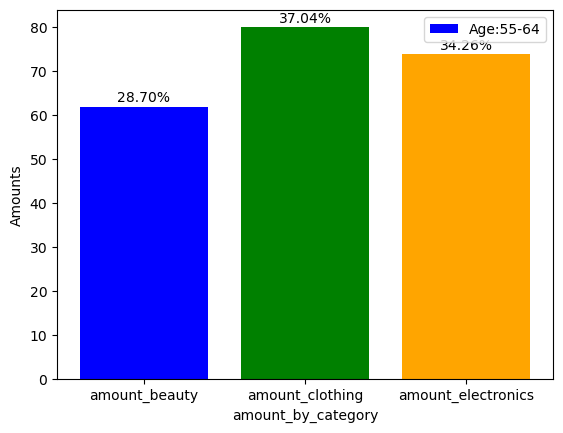

In [118]:
df1 = sum_by_age_category[['Age:18-24', 'Age:25-34', 'Age:35-44', 'Age:45-54', 'Age:55-64']]

for col in df1.columns:
    plt.bar(sum_by_age_category['amount_by_category'], df1[col], color=['blue', 'green', 'orange'], label=col)    
    plt.xlabel('amount_by_category')
    plt.ylabel('Amounts')
    plt.legend()
    for i, value in enumerate(df1[col]):
        percentage = (value / df1[col].sum()) * 100
        plt.text(i, value + 1, f'{percentage:.2f}%', ha='center')
    plt.show()

In [120]:
data4 = retail_sales_df[['product_category', 'gender']]
product_gender = pd.DataFrame(data4)

frequency_table3 = {}
categories = ['Beauty', 'Clothing', 'Electronics']

for category in categories:
    for index, row in product_gender.iterrows():
        if row['product_category'] == category:
            gender = row['gender']
            if category in frequency_table3:
                if gender in frequency_table3[category]:
                    frequency_table3[category][gender] += 1
                else:
                    frequency_table3[category][gender] = 1
            else:
                frequency_table3[category] = {gender: 1}

print("Frequency table for each category:")
for category, genders in frequency_table3.items():
    print("Category:", category)
    for gender, count in genders.items():
        print("Gender:", gender, " - Count:", count)


Frequency table for each category:
Category: Beauty
Gender: Male  - Count: 141
Gender: Female  - Count: 166
Category: Clothing
Gender: Female  - Count: 174
Gender: Male  - Count: 177
Category: Electronics
Gender: Male  - Count: 172
Gender: Female  - Count: 170


In [122]:
category_by_gender = pd.DataFrame(frequency_table3)\
.reset_index()\
.rename(columns= {'index':'gender', 'Beauty':'amount_beauty', 'Clothing':'amount_clothing', 'Electronics':'amount_electronics'})
category_by_gender

,gender,amount_beauty,amount_clothing,amount_electronics
0,Male,141,177,172
1,Female,166,174,170


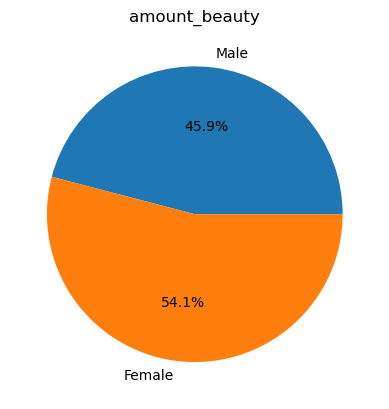

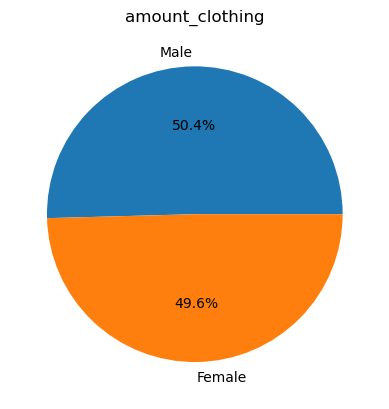

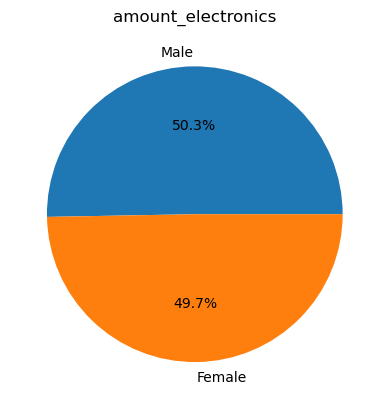

In [124]:
df2 = category_by_gender[['amount_beauty', 'amount_clothing', 'amount_electronics']]

for col in df2.columns:
    plt.figure()  
    plt.pie(df2[col], labels=category_by_gender['gender'], autopct='%1.1f%%')  
    plt.title(col)  
    plt.show()

In [130]:
retail_sales_df.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,age_group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Age:25-34
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Age:25-34
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Age:45-54
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Age:35-44
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Age:25-34


In [132]:
sales_pattern = retail_sales_df[['date', 'product_category', 'quantity', 'total_amount']]\
                .sort_values('date')\
                .reset_index()\
                .drop(columns= ['index'])
        
sales_pattern['month'] = sales_pattern['date'].dt.strftime('%B')
sales_pattern

,date,product_category,quantity,total_amount,month
0,2023-01-01,Beauty,3,1500,January
1,2023-01-01,Clothing,3,900,January
2,2023-01-01,Clothing,4,1200,January
3,2023-01-02,Electronics,3,90,January
4,2023-01-02,Beauty,1,25,January
...,...,...,...,...,...
995,2023-12-29,Beauty,2,600,December
996,2023-12-29,Beauty,3,1500,December
997,2023-12-31,Electronics,2,50,December
998,2024-01-01,Beauty,3,1500,January


In [134]:
total_sales_daily = pd.DataFrame(sales_pattern[['date', 'month', 'total_amount']]\
                    .groupby('date')['total_amount']\
                    .agg('sum'))\
                    .reset_index()
                    
total_sales_daily

,date,total_amount
0,2023-01-01,3600
1,2023-01-02,1765
2,2023-01-03,600
3,2023-01-04,1240
4,2023-01-05,1100
...,...,...
340,2023-12-27,700
341,2023-12-28,2075
342,2023-12-29,3400
343,2023-12-31,50


In [136]:
total_sales_monthly = pd.DataFrame(sales_pattern.groupby('month')['total_amount']
                                   .agg('sum'))\
                                   .reset_index()\
                                   .sort_values('total_amount', ascending=False)
total_sales_monthly

,month,total_amount
8,May,53150
10,October,46580
2,December,44690
3,February,44060
4,January,36980
1,August,36960
6,June,36715
5,July,35465
9,November,34920
0,April,33870


In [138]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December']
total_amount = [36980, 44060, 28990, 33870, 53150, 36715, 35465, 36960, 23620, 46580, 34920, 44690]

Text(0.5, 1.0, 'Overall Sales Monthly')

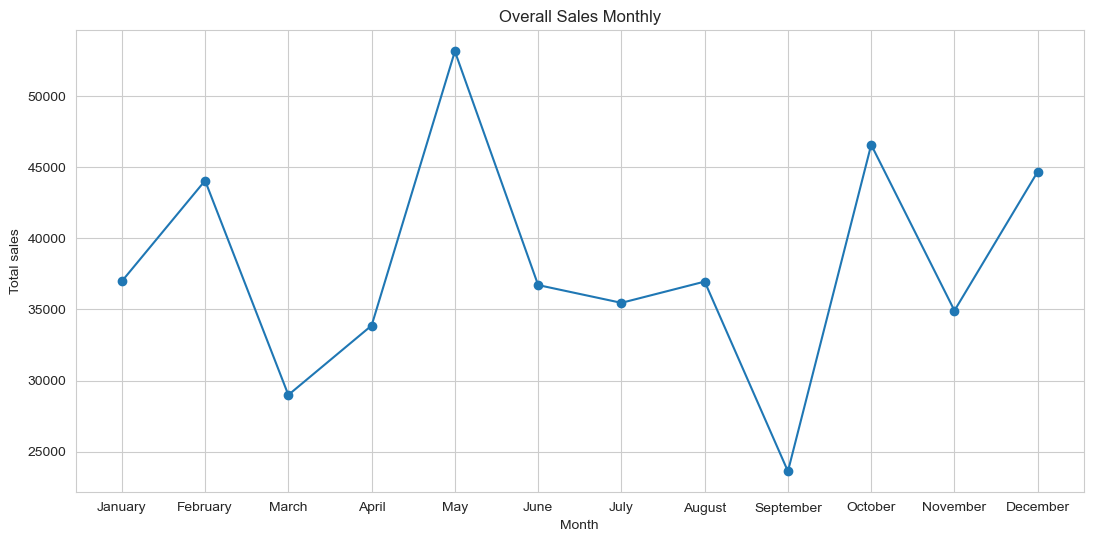

In [140]:
sns.set_style('whitegrid')
plt.figure(figsize=(13, 6))
plt.plot(month, total_amount, marker= 'o')
plt.xlabel('Month')
plt.ylabel('Total sales')
plt.title("Overall Sales Monthly")

In [142]:
def month_to_quarter(month):
    if month in ['January','February','March']:
        return 'Q1'
    elif month in ['April', 'May', 'June']:
        return 'Q2'
    elif month in ['July', 'August', 'September']  :
        return 'Q3'
    elif month in ['October', 'November', 'December']:
        return 'Q4'

In [144]:
total_sales_monthly['quarter'] = total_sales_monthly['month'].apply(month_to_quarter)

total_sales_quarter = total_sales_monthly[['quarter', 'total_amount']]\
                      .groupby('quarter')['total_amount']\
                      .agg('sum')\
                      .reset_index()
total_sales_quarter

,quarter,total_amount
0,Q1,110030
1,Q2,123735
2,Q3,96045
3,Q4,126190


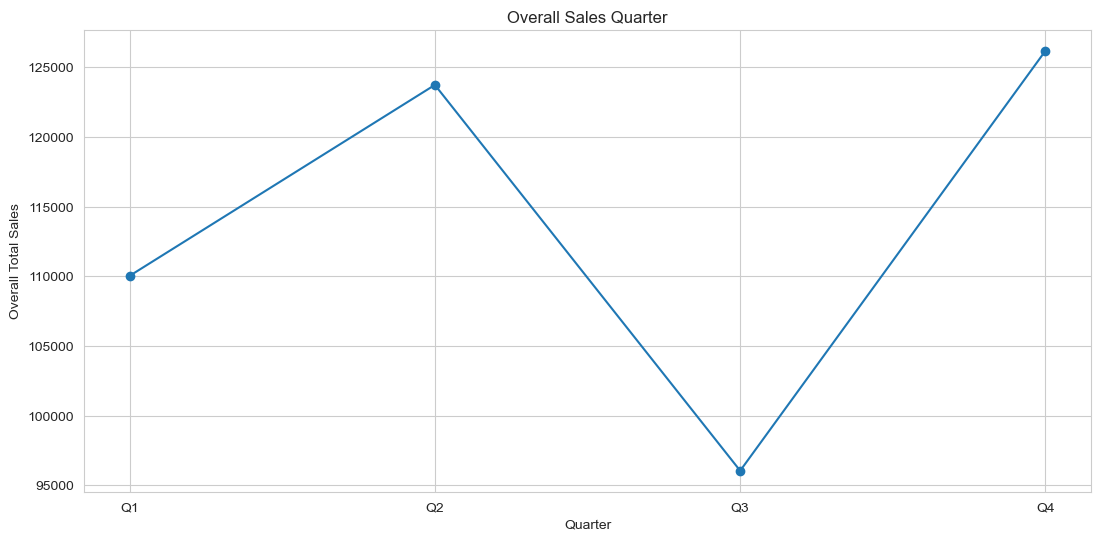

In [146]:
sns.set_style('whitegrid')
plt.figure(figsize=(13, 6))
plt.plot(total_sales_quarter['quarter'], total_sales_quarter['total_amount'], marker='o')
plt.xlabel('Quarter')
plt.ylabel('Overall Total Sales')
plt.title('Overall Sales Quarter')
plt.show()

In [148]:
# Create a list of product categories
categories = ['Beauty', 'Clothing', 'Electronics']

# Create a list of DataFrames for each product category.
sales_by_category = {}
for category in categories:
    sales_by_category[category] = sales_pattern[sales_pattern['product_category'] == category]

# Display DataFrame for each product category.
for category, df in sales_by_category.items():
    print(f"Sales for {category}:")
    print(df)
    print()


Sales for Beauty:
          date product_category  quantity  total_amount     month
0   2023-01-01           Beauty         3          1500   January
4   2023-01-02           Beauty         1            25   January
7   2023-01-03           Beauty         2           600   January
8   2023-01-04           Beauty         2          1000   January
10  2023-01-04           Beauty         3            90   January
..         ...              ...       ...           ...       ...
988 2023-12-27           Beauty         2           100  December
993 2023-12-29           Beauty         4          1200  December
995 2023-12-29           Beauty         2           600  December
996 2023-12-29           Beauty         3          1500  December
998 2024-01-01           Beauty         3          1500   January

[307 rows x 5 columns]

Sales for Clothing:
          date product_category  quantity  total_amount     month
1   2023-01-01         Clothing         3           900   January
2   2023-01-0

In [150]:
sale_beauty = sales_pattern[ sales_pattern['product_category'] == 'Beauty' ]
sale_clothing = sales_pattern[ sales_pattern['product_category'] == 'Clothing' ]
sale_electronics = sales_pattern[ sales_pattern['product_category'] == 'Electronics' ]

In [152]:
sale_beauty_monthly = pd.DataFrame(sale_beauty.groupby('month')['total_amount']
                      .agg('sum'))\
                      .reset_index()
sale_clothing_monthly = pd.DataFrame(sale_clothing.groupby('month')['total_amount']
                        .agg('sum'))\
                        .reset_index()
sale_electronics_monthly = pd.DataFrame(sale_electronics.groupby('month')['total_amount']
                           .agg('sum'))\
                           .reset_index()
merged_sale_category_monthly = sale_beauty_monthly\
                               .merge(sale_clothing_monthly, on='month')\
                               .merge(sale_electronics_monthly, on='month')\
                               .rename(columns= {'total_amount_x':'sales_beauty', 'total_amount_y':'sale_clothing', 'total_amount':'sale_electronics'})

merged_sale_category_monthly

,month,sales_beauty,sale_clothing,sale_electronics
0,April,11905,13940,8025
1,August,9790,12455,14715
2,December,12400,12070,20220
3,February,14035,14560,15465
4,January,13930,13125,9925
5,July,16090,8250,11125
6,June,10995,10170,15550
7,March,10545,15065,3380
8,May,12450,17455,23245
9,November,9700,15200,10020


In [154]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December']
total_sale_beauty = [13930, 14035, 10545, 11905, 12450, 10995, 16090, 9790, 6320, 15355, 9700, 12400]
total_sale_clothing = [13125, 14560, 15065, 13940, 17455, 10170, 8250, 12455, 9975, 13315, 15200, 12070]
total_sale_electronics = [9925, 15465, 3380, 8025, 23245, 15550, 11125, 14715, 7325, 17910, 10020, 20220]

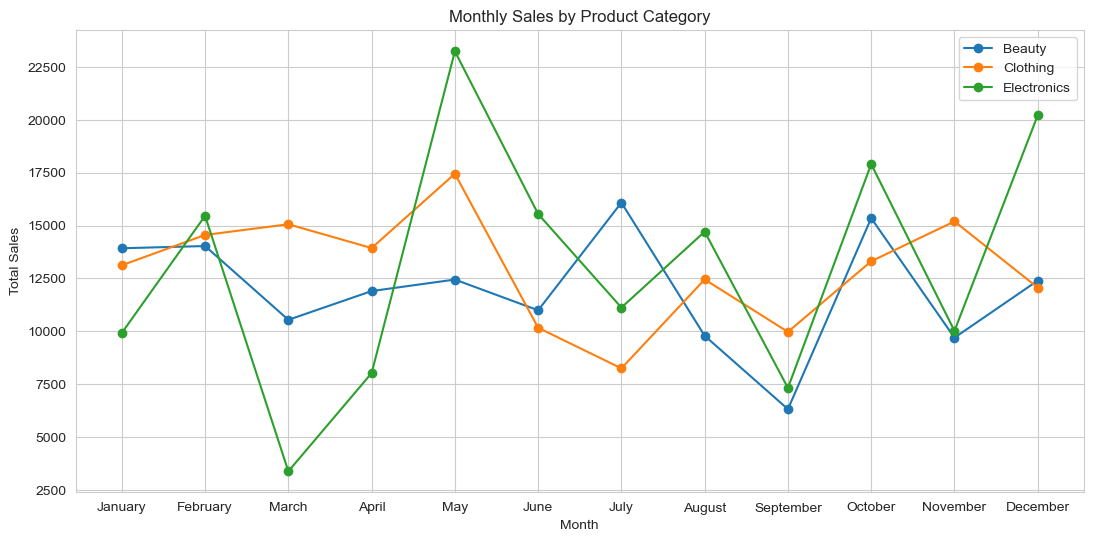

In [156]:
sns.set_style('whitegrid')
plt.figure(figsize=(13, 6))
plt.plot(month, total_sale_beauty, marker='o')
plt.plot(month, total_sale_clothing, marker='o')
plt.plot(month, total_sale_electronics, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(['Beauty', 'Clothing', 'Electronics'])
plt.title('Monthly Sales by Product Category')
plt.show()

In [158]:
merged_sale_category_monthly['quarter'] = merged_sale_category_monthly['month'].apply(month_to_quarter)
merged_sale_category_monthly.reset_index().drop(columns= ['index']).sort_values('quarter')

,month,sales_beauty,sale_clothing,sale_electronics,quarter
3,February,14035,14560,15465,Q1
4,January,13930,13125,9925,Q1
7,March,10545,15065,3380,Q1
0,April,11905,13940,8025,Q2
6,June,10995,10170,15550,Q2
8,May,12450,17455,23245,Q2
1,August,9790,12455,14715,Q3
5,July,16090,8250,11125,Q3
11,September,6320,9975,7325,Q3
2,December,12400,12070,20220,Q4


In [160]:
merged_sale_category_quarter = merged_sale_category_monthly[['quarter', 'sales_beauty', 'sale_clothing', 'sale_electronics']]\
                               .groupby('quarter')[['sales_beauty', 'sale_clothing', 'sale_electronics']]\
                               .agg('sum')\
                               .reset_index()
merged_sale_category_quarter

,quarter,sales_beauty,sale_clothing,sale_electronics
0,Q1,38510,42750,28770
1,Q2,35350,41565,46820
2,Q3,32200,30680,33165
3,Q4,37455,40585,48150


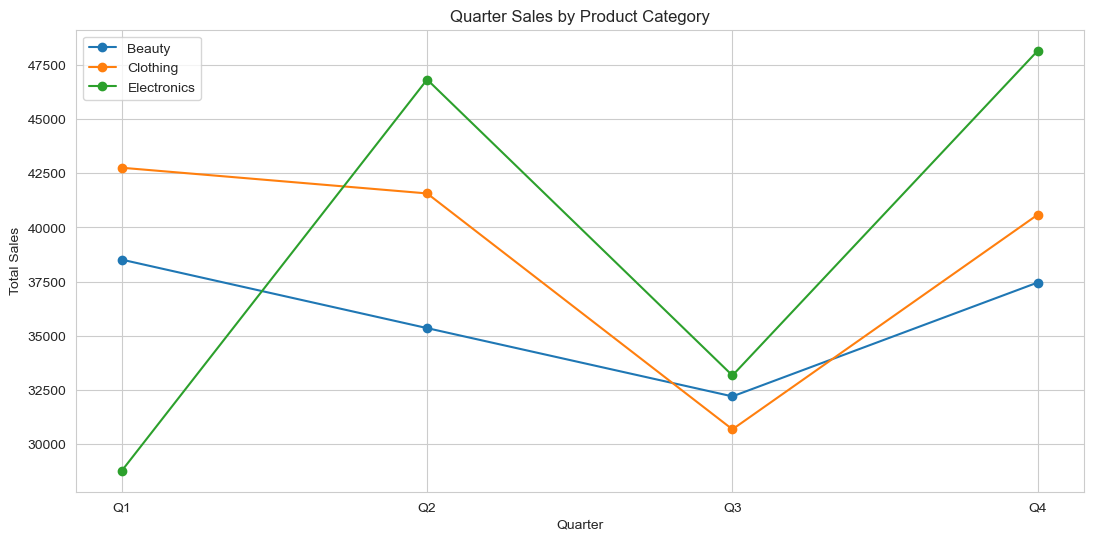

In [162]:
sns.set_style('whitegrid')
plt.figure(figsize=(13, 6))
plt.plot(merged_sale_category_quarter['quarter'], merged_sale_category_quarter['sales_beauty'], marker='o')
plt.plot(merged_sale_category_quarter['quarter'], merged_sale_category_quarter['sale_clothing'], marker='o')
plt.plot(merged_sale_category_quarter['quarter'], merged_sale_category_quarter['sale_electronics'], marker='o')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.legend(['Beauty', 'Clothing', 'Electronics'])
plt.title('Quarter Sales by Product Category')
plt.show()

In [166]:
retail_sales_df.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,age_group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Age:25-34
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Age:25-34
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Age:45-54
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Age:35-44
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Age:25-34


In [168]:
quantity_by_category = retail_sales_df[['product_category', 'quantity', 'price_per_unit']]
quantity_by_category

,product_category,quantity,price_per_unit
0,Beauty,3,50
1,Clothing,2,500
2,Electronics,1,30
3,Clothing,1,500
4,Beauty,2,50
...,...,...,...
995,Clothing,1,50
996,Beauty,3,30
997,Beauty,4,25
998,Electronics,3,50


In [170]:
sum_quantity_by_category = pd.DataFrame(quantity_by_category.groupby('product_category')['quantity']
                                        .agg('sum'))\
                                        .reset_index()\
                                        .sort_values('quantity')
sum_quantity_by_category

,product_category,quantity
0,Beauty,771
2,Electronics,849
1,Clothing,894


Text(0.5, 1.0, 'Quantity by Product Category')

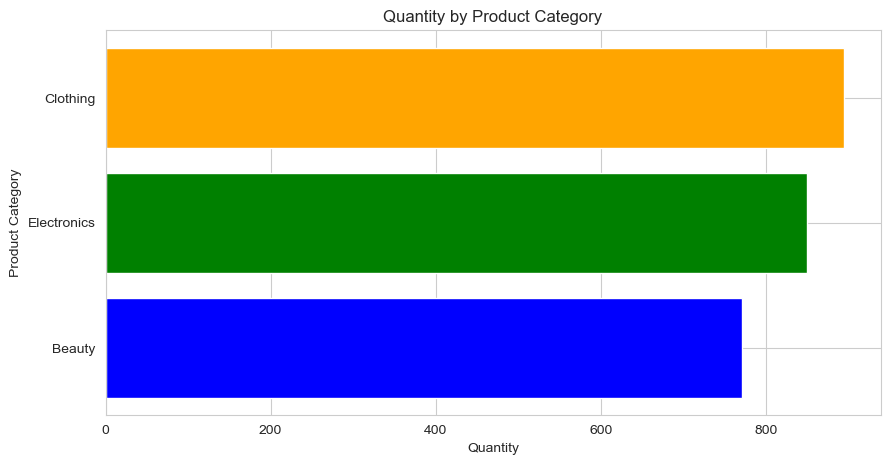

In [172]:
plt.figure(figsize=(10, 5))
plt.barh(sum_quantity_by_category['product_category'],  sum_quantity_by_category['quantity'], color=['blue', 'green', 'orange'])
plt.ylabel('Product Category')
plt.xlabel('Quantity')
plt.title('Quantity by Product Category')

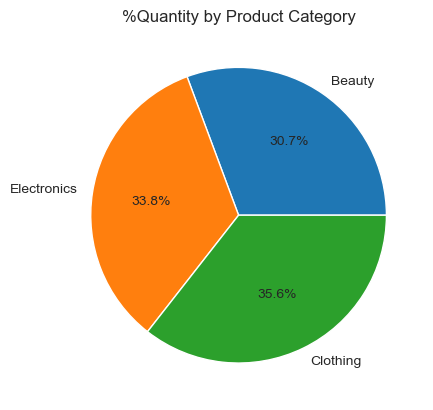

In [174]:
plt.figure()  
plt.pie(sum_quantity_by_category['quantity'], labels=sum_quantity_by_category['product_category'], autopct='%1.1f%%')  
plt.title('%Quantity by Product Category')  
plt.show()

In [176]:
quantity_by_category.head()

,product_category,quantity,price_per_unit
0,Beauty,3,50
1,Clothing,2,500
2,Electronics,1,30
3,Clothing,1,500
4,Beauty,2,50


In [178]:
quantity_product_by_category_and_price_per_unit = pd.DataFrame(frequency_table1)\
                                                    .reset_index()\
                                                    .rename(columns= {'index':'price_per_unit',
                                                                      'Beauty':'amount_beauty',
                                                                      'Clothing':'amount_clothing',
                                                                      'Electronics':'amount_electronics'})
quantity_product_by_category_and_price_per_unit

,price_per_unit,amount_beauty,amount_clothing,amount_electronics
0,50,67,75,69
1,30,56,65,62
2,25,63,75,72
3,500,68,64,67
4,300,53,72,72


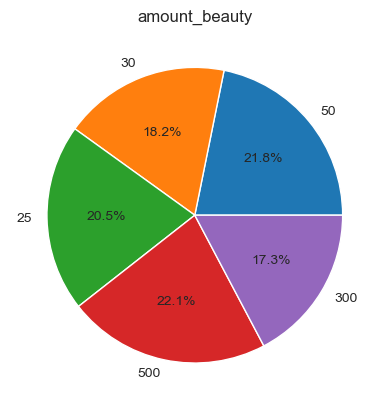

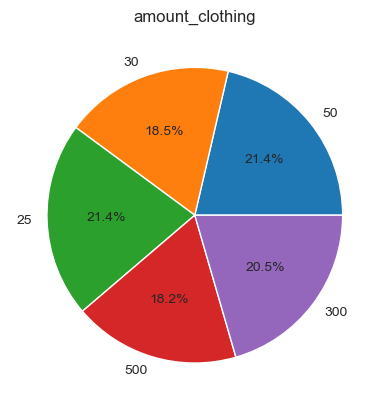

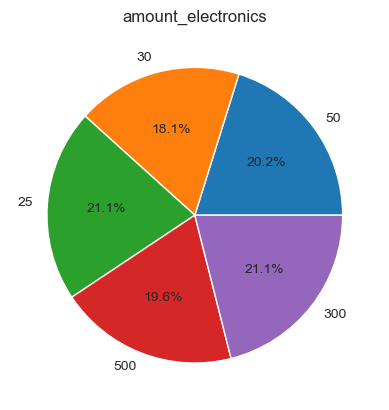

In [180]:
df9 = quantity_product_by_category_and_price_per_unit[['amount_beauty', 'amount_clothing', 'amount_electronics']]

for col in df9.columns:
    plt.figure()  
    plt.pie(df9[col], labels=quantity_product_by_category_and_price_per_unit['price_per_unit'], autopct='%1.1f%%')  
    plt.title(col)  
    plt.show()

In [184]:
retail_sales_df.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,age_group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Age:25-34
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Age:25-34
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Age:45-54
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Age:35-44
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Age:25-34


In [186]:
relation = retail_sales_df[['gender', 'age', 'product_category', 'quantity', 'total_amount', 'age_group']]
relation

,gender,age,product_category,quantity,total_amount,age_group
0,Male,34,Beauty,3,150,Age:25-34
1,Female,26,Clothing,2,1000,Age:25-34
2,Male,50,Electronics,1,30,Age:45-54
3,Male,37,Clothing,1,500,Age:35-44
4,Male,30,Beauty,2,100,Age:25-34
...,...,...,...,...,...,...
995,Male,62,Clothing,1,50,Age:55-64
996,Male,52,Beauty,3,90,Age:45-54
997,Female,23,Beauty,4,100,Age:18-24
998,Female,36,Electronics,3,150,Age:35-44


In [188]:
overall_spending_agegroup = pd.DataFrame(relation.groupby('age_group')['total_amount'].agg('sum')).reset_index()
overall_spending_agegroup

,age_group,total_amount
0,Age:18-24,74650
1,Age:25-34,97090
2,Age:35-44,96835
3,Age:45-54,97235
4,Age:55-64,90190


In [190]:
customer_18_24 = relation[ relation['age_group'] == 'Age:18-24' ].sort_values('product_category')
customer_25_34 = relation[ relation['age_group'] == 'Age:25-34' ].sort_values('product_category')
customer_35_44 = relation[ relation['age_group'] == 'Age:35-44' ].sort_values('product_category')
customer_45_54 = relation[ relation['age_group'] == 'Age:45-54' ].sort_values('product_category')
customer_55_64 = relation[ relation['age_group'] == 'Age:55-64' ].sort_values('product_category')

In [192]:
customer_18_24.head()

,gender,age,product_category,quantity,total_amount,age_group
997,Female,23,Beauty,4,100,Age:18-24
668,Male,24,Beauty,4,1200,Age:18-24
446,Male,22,Beauty,4,2000,Age:18-24
643,Male,23,Beauty,3,75,Age:18-24
239,Female,23,Beauty,1,300,Age:18-24


In [194]:
customer_18_24_category = pd.DataFrame(customer_18_24.groupby('product_category')['total_amount'].agg('sum').reset_index())
customer_25_34_category = pd.DataFrame(customer_25_34.groupby('product_category')['total_amount'].agg('sum').reset_index())
customer_35_44_category = pd.DataFrame(customer_35_44.groupby('product_category')['total_amount'].agg('sum').reset_index())
customer_45_54_category = pd.DataFrame(customer_45_54.groupby('product_category')['total_amount'].agg('sum').reset_index())
customer_55_64_category = pd.DataFrame(customer_55_64.groupby('product_category')['total_amount'].agg('sum').reset_index())

In [196]:
customer_55_64_category

,product_category,total_amount
0,Beauty,20670
1,Clothing,31310
2,Electronics,38210


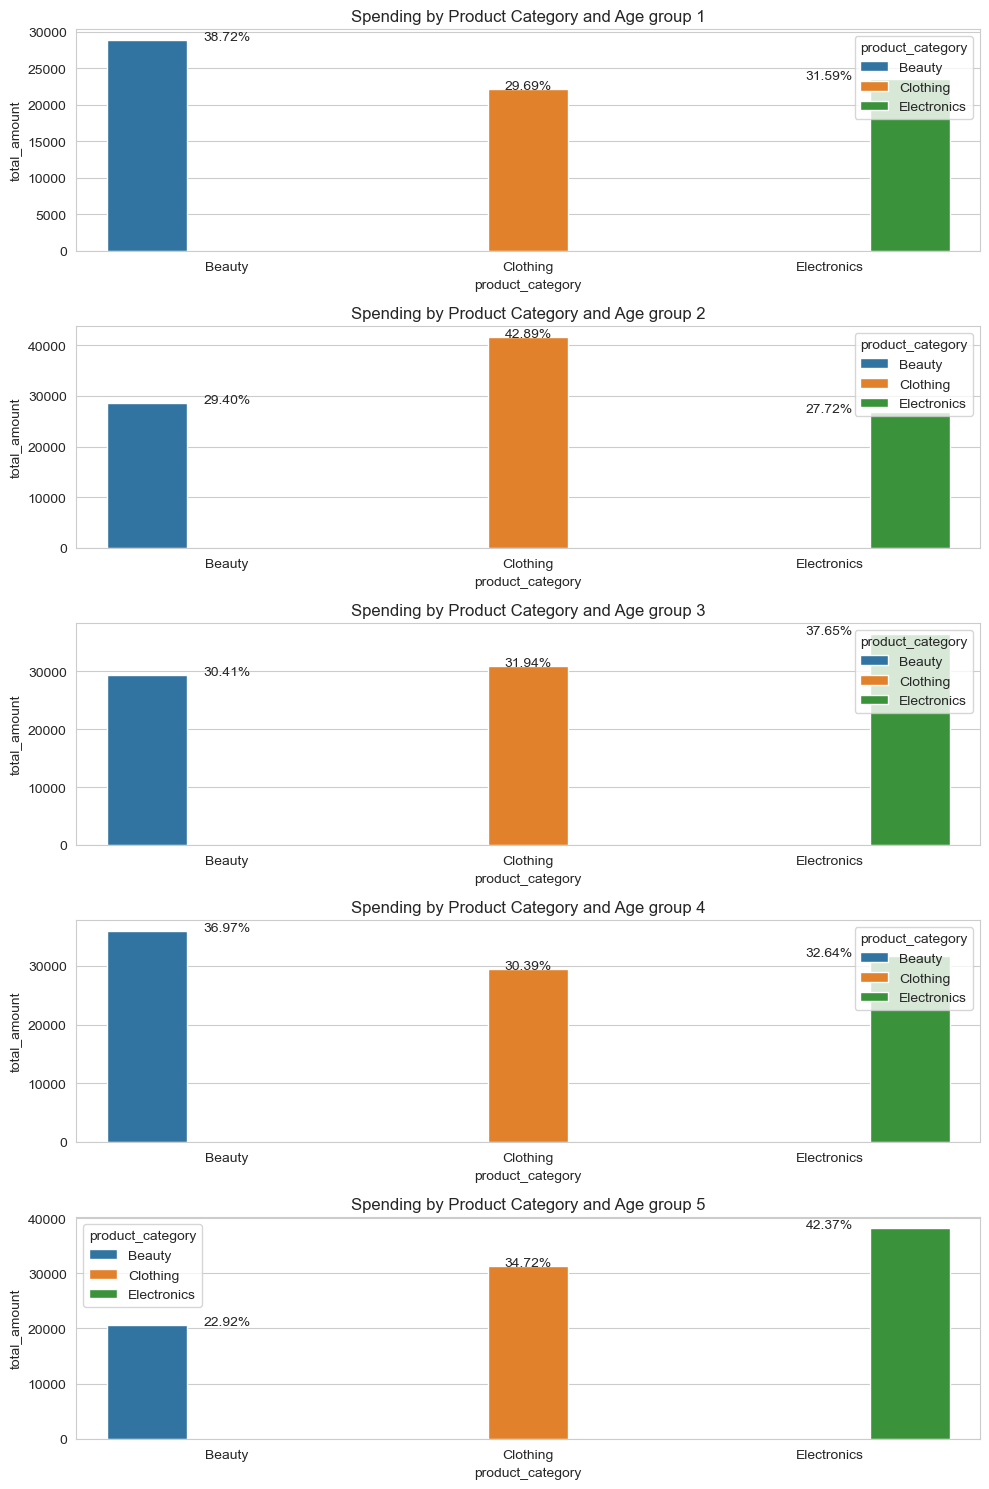

In [198]:
customer_age_category_df = [customer_18_24_category, customer_25_34_category, customer_35_44_category, customer_45_54_category, customer_55_64_category]

# Create a subplot with multiple rows.
fig, axes = plt.subplots(nrows=len(customer_age_category_df), figsize=(10, 15))

# Loop to create bar graphs for each age group.
for i, df in enumerate(customer_age_category_df):
    sns.barplot(x='product_category', y='total_amount', hue='product_category', data=df, ax=axes[i])
    axes[i].set_title(f'Spending by Product Category and Age group {i+1}')
    for j, value in enumerate(df['total_amount']):
        percentage = (value / df['total_amount'].sum()) * 100
        axes[i].text(j, value + 1, f'{percentage:.2f}%', ha='center')
    
    
plt.tight_layout()
plt.show()

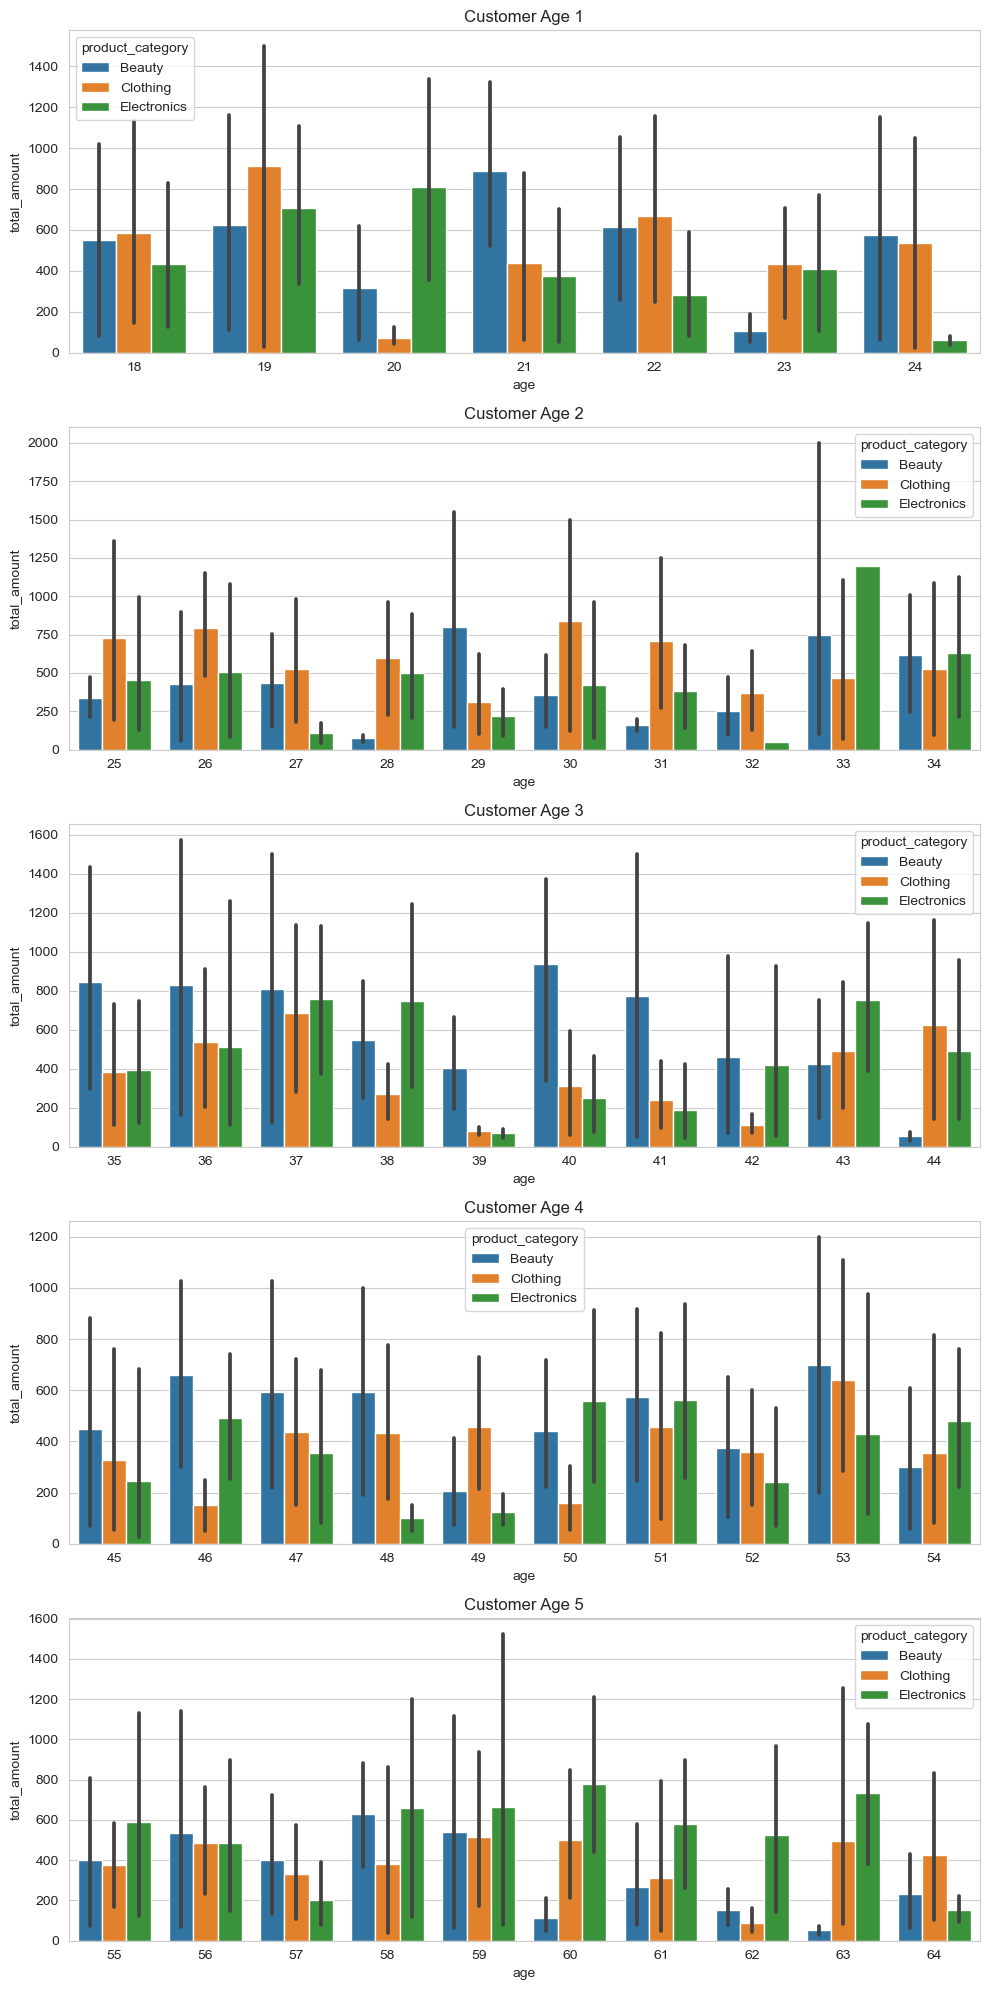

In [200]:
customer_age_df = [customer_18_24, customer_25_34, customer_35_44, customer_45_54, customer_55_64]

# Create a subplot with multiple rows. 
fig, axes = plt.subplots(nrows=len(customer_age_df), figsize=(10, 20))

# Loop to create bar graphs for each age group.
for i, df in enumerate(customer_age_df):
    sns.barplot(x='age', y='total_amount', hue='product_category', data=df, ax=axes[i])
    axes[i].set_title(f'Customer Age {i+1}')

plt.tight_layout()
plt.show()

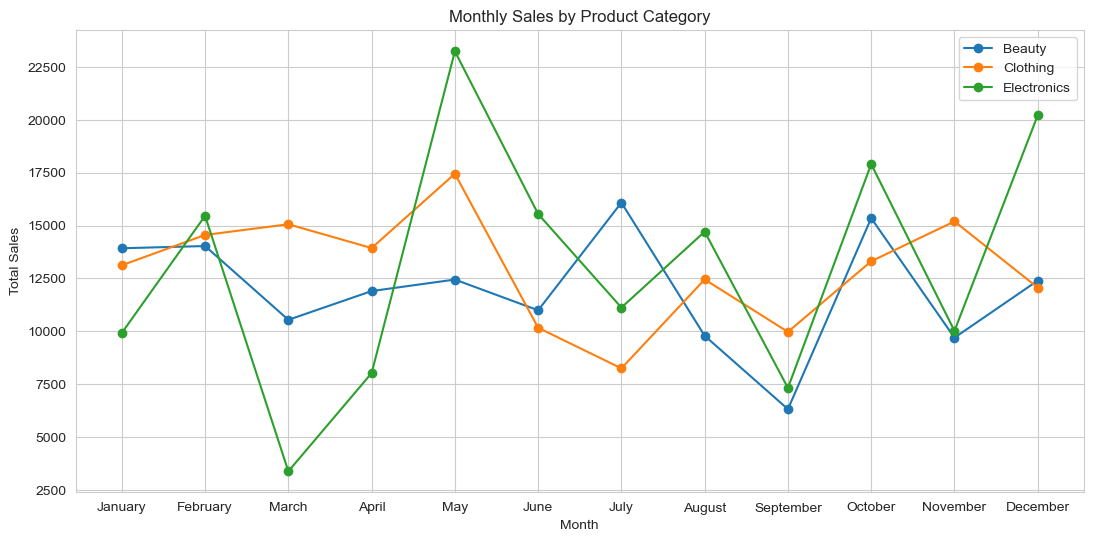

In [203]:
sns.set_style('whitegrid')
plt.figure(figsize=(13, 6))
plt.plot(month, total_sale_beauty, marker='o')
plt.plot(month, total_sale_clothing, marker='o')
plt.plot(month, total_sale_electronics, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(['Beauty', 'Clothing', 'Electronics'])
plt.title('Monthly Sales by Product Category')
plt.show()

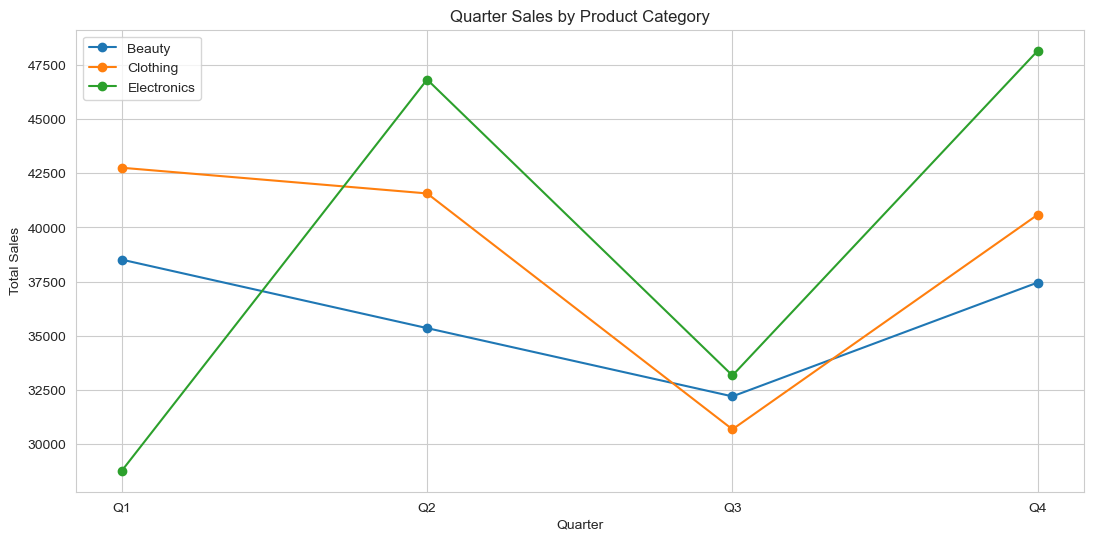

In [204]:
sns.set_style('whitegrid')
plt.figure(figsize=(13, 6))
plt.plot(merged_sale_category_quarter['quarter'], merged_sale_category_quarter['sales_beauty'], marker='o')
plt.plot(merged_sale_category_quarter['quarter'], merged_sale_category_quarter['sale_clothing'], marker='o')
plt.plot(merged_sale_category_quarter['quarter'], merged_sale_category_quarter['sale_electronics'], marker='o')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.legend(['Beauty', 'Clothing', 'Electronics'])
plt.title('Quarter Sales by Product Category')
plt.show()

In [207]:
retail_sales_df.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,age_group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Age:25-34
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Age:25-34
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Age:45-54
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Age:35-44
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Age:25-34


In [211]:
quantity_per_transaction = retail_sales_df[['transaction_id', 'product_category', 'quantity', 'price_per_unit']]
quantity_per_transaction.head()

,transaction_id,product_category,quantity,price_per_unit
0,1,Beauty,3,50
1,2,Clothing,2,500
2,3,Electronics,1,30
3,4,Clothing,1,500
4,5,Beauty,2,50


In [214]:
beauty_quantity_per_transaction = pd.DataFrame(quantity_per_transaction[quantity_per_transaction['product_category'] == 'Beauty' ]\
                                               .groupby('quantity')['quantity']\
                                               .agg('count'))\
                                               .rename(columns= {'quantity':'beauty_amount_quantity'})\
                                               .reset_index()
clothing_quantity_per_transaction = pd.DataFrame(quantity_per_transaction[quantity_per_transaction['product_category'] == 'Clothing' ]\
                                                 .groupby('quantity')['quantity']\
                                                 .agg('count'))\
                                                 .rename(columns= {'quantity':'clothing_amount_quantity'})\
                                                 .reset_index()
electronics_quantity_per_transaction = pd.DataFrame(quantity_per_transaction[quantity_per_transaction['product_category'] == 'Electronics' ]\
                                                    .groupby('quantity')['quantity']\
                                                    .agg('count'))\
                                                    .rename(columns= {'quantity':'electronics_amount_quantity'})\
                                                    .reset_index()

In [216]:
beauty_quantity_per_transaction

,quantity,beauty_amount_quantity
0,1,74
1,2,75
2,3,85
3,4,73


In [218]:
count_quantity_per_transaction = beauty_quantity_per_transaction.merge(clothing_quantity_per_transaction, on='quantity').merge(electronics_quantity_per_transaction, on='quantity')
count_quantity_per_transaction

,quantity,beauty_amount_quantity,clothing_amount_quantity,electronics_amount_quantity
0,1,74,88,91
1,2,75,80,88
2,3,85,86,70
3,4,73,97,93


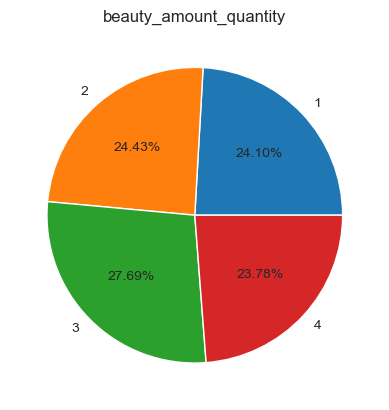

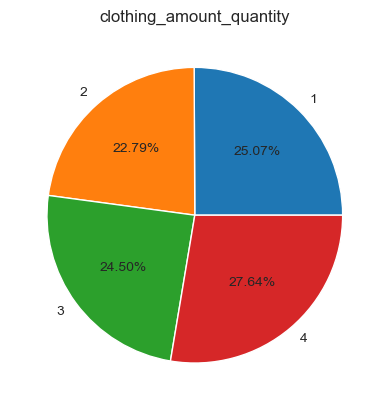

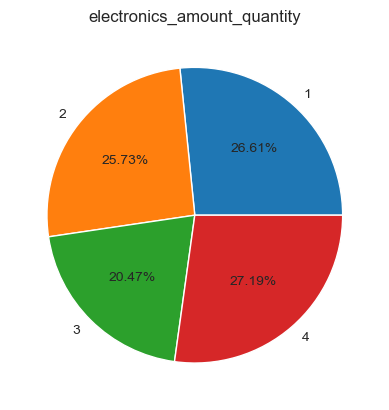

In [220]:
df10 = count_quantity_per_transaction[['beauty_amount_quantity', 'clothing_amount_quantity', 'electronics_amount_quantity']]

for col in df10.columns:
    plt.figure()  
    plt.pie(df10[col], labels=count_quantity_per_transaction['quantity'], autopct='%1.2f%%')  
    plt.title(col)  
    plt.show()

In [81]:
# list of product category and quantity
product_category = ['Beauty', 'Clothing', 'Electronics']
quantity = [1, 2, 3, 4]

# Create Dataframe for price/unit in each product categoryสร้าง DataFrame สำหรับการขายสินค้าแต่ละหมวดหมู่
all_quantity_per_transaction = {}

for category in product_category:
    for qty in quantity:
        # Select data from the table that matches the product category and specified quantity.
        filtered_data = quantity_per_transaction[
            (quantity_per_transaction['product_category'] == category) &
            (quantity_per_transaction['quantity'] == qty)
        ]
        # Group data by unit price and count the number of items in each group.
        group_count = filtered_data.groupby('price_per_unit')['price_per_unit'].agg('count')
        # Add data into dictionary
        all_quantity_per_transaction[(category, qty)] = group_count

# Create Dataframe from dictionary
all_quantity_per_transaction_df = pd.DataFrame(all_quantity_per_transaction)

print(all_quantity_per_transaction_df)

               Beauty             Clothing             Electronics            
                    1   2   3   4        1   2   3   4           1   2   3   4
price_per_unit                                                                
25                 18  11  19  15       21  19  15  20          12  31   9  20
30                 16  13  17  10       13  17  16  19          22  15  11  14
50                 16  20  10  21       20  17  17  21          18  16  15  20
300                10  11  18  14       14  15  23  20          22   9  21  20
500                14  20  21  13       20  12  15  17          17  17  14  19


In [82]:
retail_sales_df.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,age_group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Age:25-34
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Age:25-34
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Age:45-54
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Age:35-44
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Age:25-34


In [83]:
product_prices_by_category = retail_sales_df[['date', 'gender', 'age', 'product_category', 'quantity', 'price_per_unit', 'total_amount', 'age_group']]
product_prices_by_category.head()

,date,gender,age,product_category,quantity,price_per_unit,total_amount,age_group
0,2023-11-24,Male,34,Beauty,3,50,150,Age:25-34
1,2023-02-27,Female,26,Clothing,2,500,1000,Age:25-34
2,2023-01-13,Male,50,Electronics,1,30,30,Age:45-54
3,2023-05-21,Male,37,Clothing,1,500,500,Age:35-44
4,2023-05-06,Male,30,Beauty,2,50,100,Age:25-34


In [84]:
product_prices_by_category[ product_prices_by_category['product_category'] == 'Beauty'].head()

,date,gender,age,product_category,quantity,price_per_unit,total_amount,age_group
0,2023-11-24,Male,34,Beauty,3,50,150,Age:25-34
4,2023-05-06,Male,30,Beauty,2,50,100,Age:25-34
5,2023-04-25,Female,45,Beauty,1,30,30,Age:45-54
11,2023-10-30,Male,35,Beauty,3,25,75,Age:35-44
20,2023-01-14,Female,50,Beauty,1,500,500,Age:45-54


In [85]:
df99 = pd.DataFrame(product_prices_by_category.groupby(['product_category', 'price_per_unit'])['quantity']\
                    .sum())\
                    .reset_index()\
                    .sort_values('price_per_unit')
df99['total_sales'] = df99['price_per_unit'] * df99['quantity']
df99

,product_category,price_per_unit,quantity,total_sales
0,Beauty,25,157,3925
5,Clothing,25,184,4600
10,Electronics,25,181,4525
1,Beauty,30,133,3990
6,Clothing,30,171,5130
11,Electronics,30,141,4230
2,Beauty,50,170,8500
7,Clothing,50,189,9450
12,Electronics,50,175,8750
3,Beauty,300,142,42600


**1. Top-Selling Items at Same Price levels**

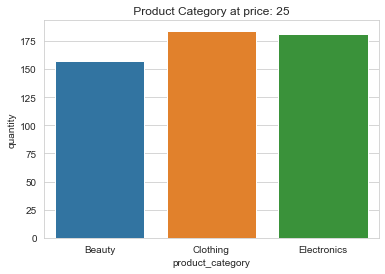

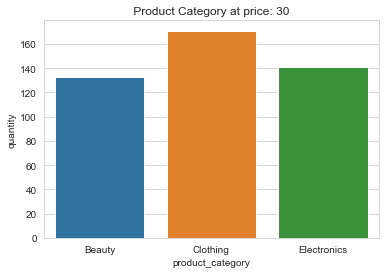

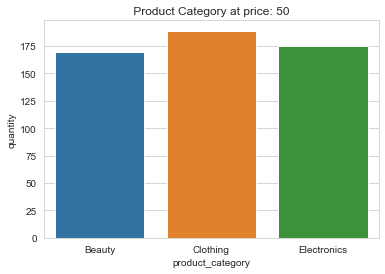

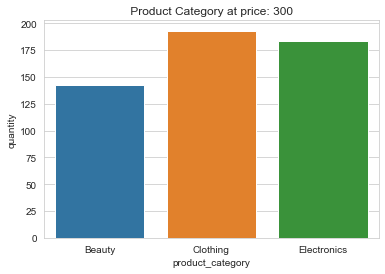

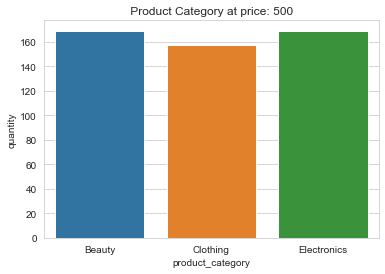

In [86]:
prices = [25,30,50,300,500]

for price in prices:
    sns.barplot(x='product_category', y='quantity', data=df99[ df99['price_per_unit'] == price ])
    plt.title(f" Product Category at price: {price} ")
    plt.show()

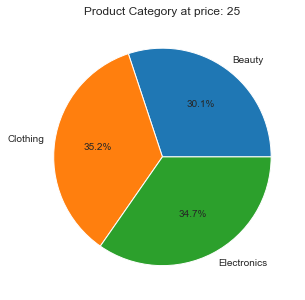

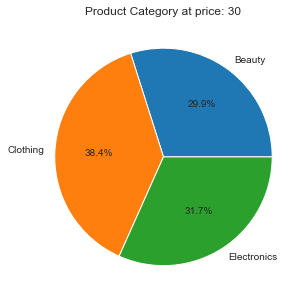

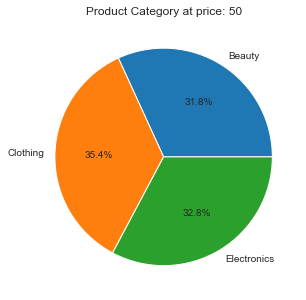

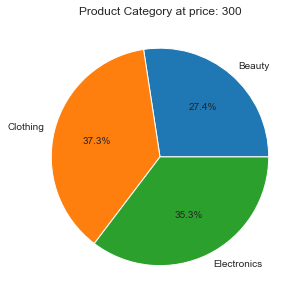

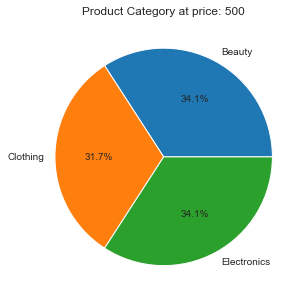

In [87]:
for price in prices:
    subset_data = df99[df99['price_per_unit'] == price]
    quantity_by_category = subset_data.groupby('product_category')['quantity'].sum()
    plt.figure(figsize=(5, 5))
    plt.pie(quantity_by_category, labels=quantity_by_category.index, autopct='%1.1f%%')
    plt.title(f"Product Category at price: {price}")
    plt.show()

**2. Sales Volume Across Price levels, Compared within Each Product Category**

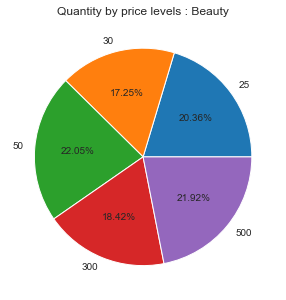

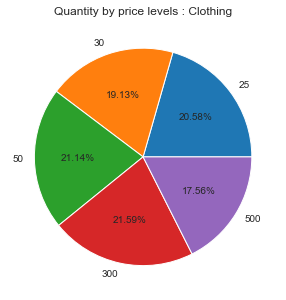

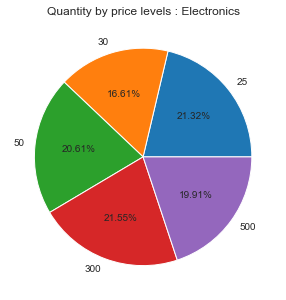

In [88]:
categories = ['Beauty', 'Clothing', 'Electronics']

for category in categories:
    subset_data = df99[df99['product_category'] == category]
    quantity_by_category = subset_data.groupby('price_per_unit')['quantity'].sum()
    plt.figure(figsize=(5, 5))
    plt.pie(quantity_by_category, labels=quantity_by_category.index, autopct='%1.2f%%')
    plt.title(f"Quantity by price levels : {category}")
    plt.show()